# Models
This notebook contains the models developed by Nicola Farenga and Giorgio Longari for the 2nd homework of the Artificial Neural Networks and Deep Learning Course, Politecnico di Milano.

The complete repository is available at [github.com/farenga/anndl-hw2](https://github.com/farenga/anndl-hw2)

In [37]:
import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers

## Base models

In [38]:
input_shape = (200,7)
n_units = 256

In [39]:
def build_rnn(input_shape,n_units):


    input_layer = tfkl.Input(shape=input_shape, name='Input')

    x = tfkl.SimpleRNN(units=n_units, return_sequences=False,return_state=False)(input_layer)
    
    output_layer = tfkl.Dense(7)(x)
    
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')
    
    return model

model = build_rnn(input_shape,n_units)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 200, 7)]          0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 256)               67584     
_________________________________________________________________
dense_27 (Dense)             (None, 7)                 1799      
Total params: 69,383
Trainable params: 69,383
Non-trainable params: 0
_________________________________________________________________


In [40]:
def build_lstm(input_shape,n_units):


    input_layer = tfkl.Input(shape=input_shape, name='Input')

    x = tfkl.LSTM(units=n_units, return_sequences=False,return_state=False)(input_layer)
    
    output_layer = tfkl.Dense(7)(x)
    
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')
    
    return model

model = build_lstm(input_shape,n_units)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 200, 7)]          0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 256)               270336    
_________________________________________________________________
dense_28 (Dense)             (None, 7)                 1799      
Total params: 272,135
Trainable params: 272,135
Non-trainable params: 0
_________________________________________________________________


In [41]:
def build_stacked_lstm(input_shape,n_units):


    input_layer = tfkl.Input(shape=input_shape, name='Input')

    x = tfkl.LSTM(units=n_units, return_sequences=True,return_state=True)(input_layer)
    x = tfkl.LSTM(units=n_units, return_sequences=False,return_state=False)(x)
    
    output_layer = tfkl.Dense(7)(x)
    
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')
    
    return model

model = build_stacked_lstm(input_shape,n_units)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 200, 7)]     0                                            
__________________________________________________________________________________________________
lstm_29 (LSTM)                  [(None, 200, 256), ( 270336      Input[0][0]                      
__________________________________________________________________________________________________
lstm_30 (LSTM)                  (None, 256)          525312      lstm_29[0][0]                    
                                                                 lstm_29[0][1]                    
                                                                 lstm_29[0][2]                    
______________________________________________________________________________________________

In [42]:
def build_gru(input_shape,n_units):


    input_layer = tfkl.Input(shape=input_shape, name='Input')

    x = tfkl.GRU(units=n_units, return_sequences=False,return_state=False)(input_layer)
    
    output_layer = tfkl.Dense(7)(x)
    
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')
    
    return model

model = build_gru(input_shape,n_units)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 200, 7)]          0         
_________________________________________________________________
gru_2 (GRU)                  (None, 256)               203520    
_________________________________________________________________
dense_30 (Dense)             (None, 7)                 1799      
Total params: 205,319
Trainable params: 205,319
Non-trainable params: 0
_________________________________________________________________


## Seq2Seq and Attention

In [43]:
n_units = 512

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 200, 7)]     0                                            
__________________________________________________________________________________________________
lstm_31 (LSTM)                  [(None, 512), (None, 1064960     Input[0][0]                      
__________________________________________________________________________________________________
repeat_vector_4 (RepeatVector)  (None, 1, 512)       0           lstm_31[0][0]                    
__________________________________________________________________________________________________
lstm_32 (LSTM)                  (None, 1, 512)       2099200     repeat_vector_4[0][0]            
                                                                 lstm_31[0][1]                

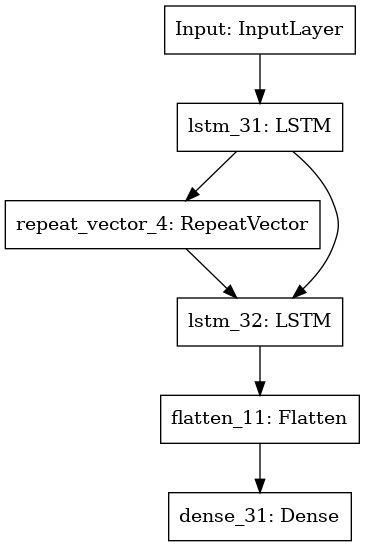

In [44]:
def build_lstm_seq2seq(input_shape,n_units):

    input_layer = tfkl.Input(shape=input_shape, name='Input')
    
    x,h,c = tfkl.LSTM(units=n_units, return_sequences=False,return_state=True)(input_layer)
    x = tfkl.RepeatVector(1)(x)
    x = tfkl.LSTM(units=n_units, return_sequences=True,return_state=False)(x,initial_state=[h,c])
    x = tfkl.Flatten()(x)
    output_layer = tfkl.Dense(7)(x)
    
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')
    
    return model

model = build_lstm_seq2seq(input_shape,n_units)
model.summary()
tfk.utils.plot_model(model, expand_nested=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 200, 7)]     0                                            
__________________________________________________________________________________________________
lstm_33 (LSTM)                  [(None, 200, 512), ( 1064960     Input[0][0]                      
__________________________________________________________________________________________________
repeat_vector_5 (RepeatVector)  (None, 1, 512)       0           lstm_33[0][1]                    
__________________________________________________________________________________________________
lstm_34 (LSTM)                  (None, 1, 512)       2099200     repeat_vector_5[0][0]            
                                                                 lstm_33[0][1]                

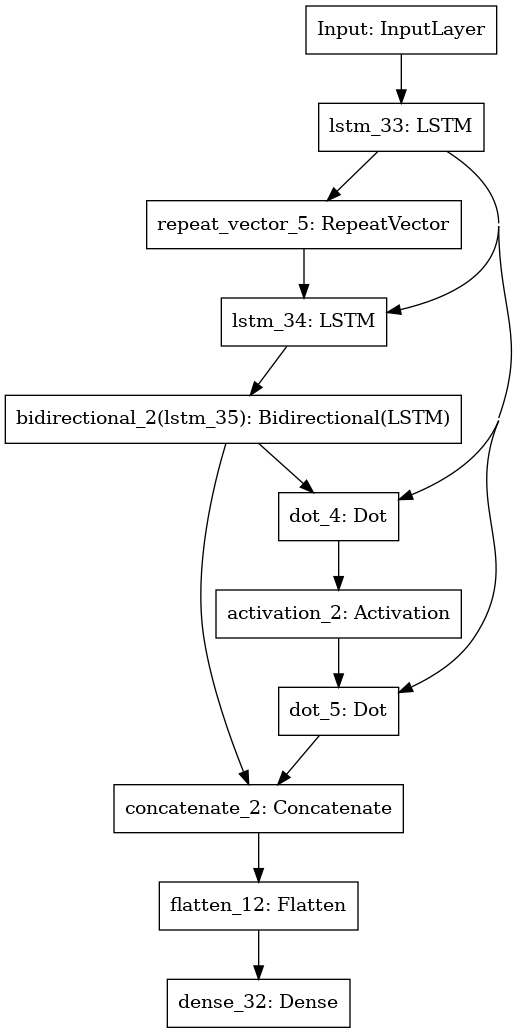

In [45]:
def build_lstm_seq2seq_attention(input_shape,n_units):

    
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    
    encoder_x,encoder_h,encoder_c = tfkl.LSTM(units=n_units, return_sequences=True,return_state=True)(input_layer)
    
    decoder_in = tfkl.RepeatVector(1)(encoder_h)
    
    x = tfkl.LSTM(units=n_units, return_sequences=True,return_state=False)(decoder_in,initial_state=[encoder_h,encoder_c])
    decoder_x = tfkl.Bidirectional(tfkl.LSTM(units=int(n_units/2), return_sequences=True,return_state=False))(x)
    
    attention = tfkl.Dot(axes=[2,2])([decoder_x, encoder_x])
    attention = tfkl.Activation('softmax')(attention)
    context = tfkl.Dot(axes=[2,1])([attention,encoder_x])
    
    concatenated_c = tfkl.Concatenate()([context,decoder_x]) 
    concatenated_c = tfkl.Flatten()(concatenated_c)
    output_layer = tfkl.Dense(7)(concatenated_c)
    
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')
    
    return model

model = build_lstm_seq2seq_attention(input_shape,n_units)
model.summary()
tfk.utils.plot_model(model, expand_nested=True)

## CNNs + LSTMs

In [46]:
input_shape = (400,7)
future = 4

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 400, 7)]          0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 398, 16)           352       
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 396, 32)           1568      
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 394, 64)           6208      
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 392, 128)          24704     
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 196, 128)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 25088)             0     

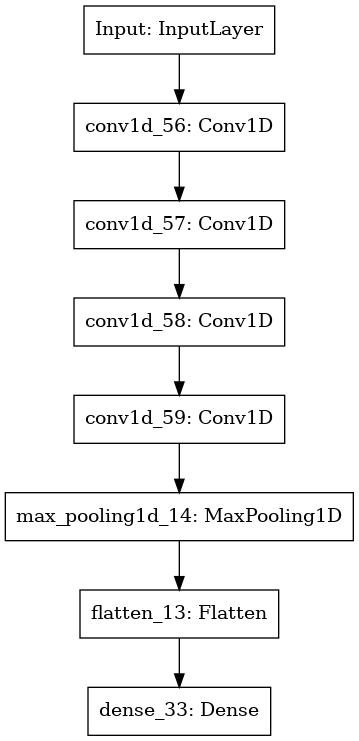

In [47]:
def build_conv(input_shape):


    input_layer = tfkl.Input(shape=input_shape, name='Input')

    x = tfkl.Conv1D(filters=16,kernel_size=3,padding="valid",activation='relu')(input_layer)
    x = tfkl.Conv1D(filters=32,kernel_size=3,padding="valid",activation='relu')(x)
    x = tfkl.Conv1D(filters=64,kernel_size=3,padding="valid",activation='relu')(x)
    x = tfkl.Conv1D(filters=128,kernel_size=3,padding="valid",activation='relu')(x)
    x = tfkl.MaxPool1D()(x)
    x = tfkl.Flatten()(x)
    output_layer = tfkl.Dense(7)(x)
    
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')
    
    return model

model = build_conv(input_shape)
model.summary()
tfk.utils.plot_model(model, expand_nested=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 400, 7)]          0         
_________________________________________________________________
conv1d_60 (Conv1D)           (None, 398, 64)           1408      
_________________________________________________________________
conv1d_61 (Conv1D)           (None, 396, 128)          24704     
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 198, 128)          0         
_________________________________________________________________
lstm_36 (LSTM)               (None, 198, 512)          1312768   
_________________________________________________________________
flatten_14 (Flatten)         (None, 101376)            0         
_________________________________________________________________
dense_34 (Dense)             (None, 7)                 709639

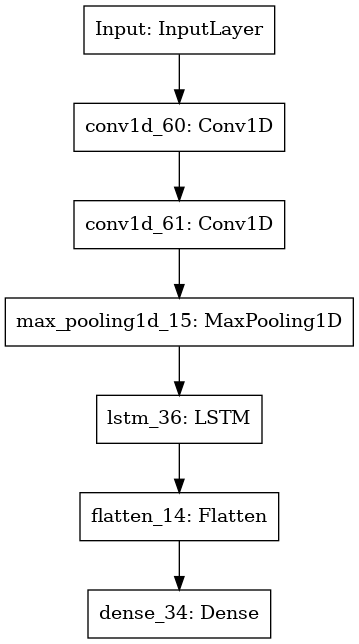

In [48]:
def build_convlstm(input_shape):


    input_layer = tfkl.Input(shape=input_shape, name='Input')

    x = tfkl.Conv1D(filters=64,kernel_size=3,padding="valid",activation='relu')(input_layer)
    x = tfkl.Conv1D(filters=128,kernel_size=3,padding="valid",activation='relu')(x)
    x = tfkl.MaxPool1D()(x)
        
    x = tfkl.LSTM(units=512, return_sequences=True,return_state=False)(x)


    x = tfkl.Flatten()(x)
    output_layer = tfkl.Dense(7)(x)
    
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')
    
    return model

model = build_convlstm(input_shape)
model.summary()
tfk.utils.plot_model(model, expand_nested=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 400, 7)]     0                                            
__________________________________________________________________________________________________
conv1d_62 (Conv1D)              (None, 400, 16)      352         Input[0][0]                      
__________________________________________________________________________________________________
conv1d_63 (Conv1D)              (None, 400, 32)      1568        conv1d_62[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_16 (MaxPooling1D) (None, 200, 32)      0           conv1d_63[0][0]                  
______________________________________________________________________________________________

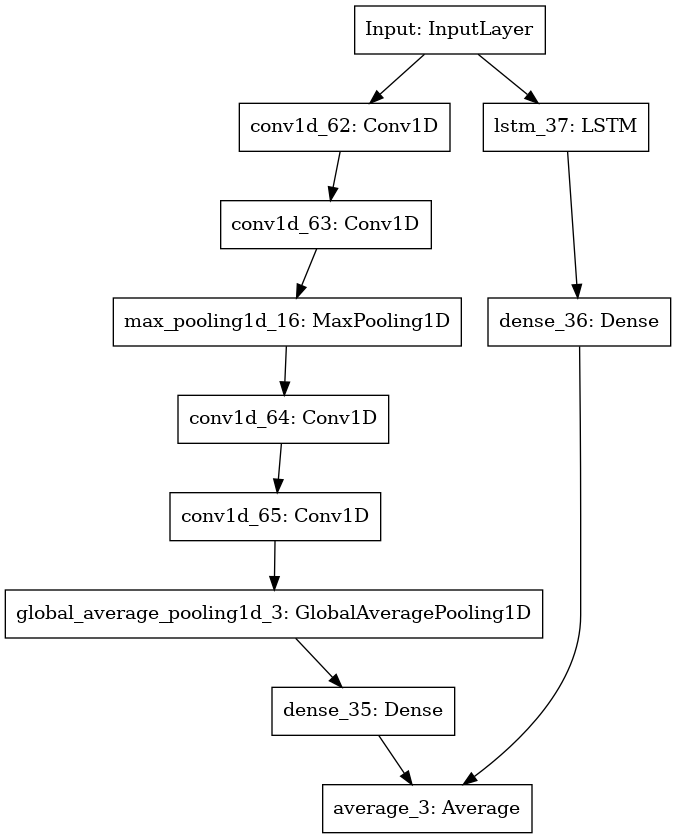

In [49]:
def build_conv_lstm_avg(input_shape):


    input_layer = tfkl.Input(shape=input_shape, name='Input')

    b1 = tfkl.Conv1D(filters=16,kernel_size=3,dilation_rate=1,padding="same",activation='relu')(input_layer)
    b1 = tfkl.Conv1D(filters=32,kernel_size=3,dilation_rate=1,padding="same",activation='relu')(b1)
    b1_out = tfkl.MaxPool1D()(b1)
    
    
    b2 = tfkl.Conv1D(filters=64,kernel_size=3,dilation_rate=2,padding="same",activation='relu')(b1_out)
    b2 = tfkl.Conv1D(filters=128,kernel_size=3,dilation_rate=2,padding="same",activation='relu')(b2)
    b2_out = tfkl.GlobalAveragePooling1D()(b2)
    o_2 = tfkl.Dense(7)(b2_out)

    
    lstm_1 = tfkl.LSTM(units=512,return_sequences=False, return_state=False)(input_layer)
    o_1 = tfkl.Dense(7)(lstm_1)

    output_layer = tfkl.Average()([ o_1, o_2])
        
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')
    
    return model

model = build_conv_lstm_avg(input_shape)
model.summary()
tfk.utils.plot_model(model, expand_nested=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 400, 7)]     0                                            
__________________________________________________________________________________________________
conv1d_66 (Conv1D)              (None, 400, 16)      352         Input[0][0]                      
__________________________________________________________________________________________________
conv1d_67 (Conv1D)              (None, 400, 32)      1568        conv1d_66[0][0]                  
__________________________________________________________________________________________________
conv1d_68 (Conv1D)              (None, 400, 64)      6208        conv1d_67[0][0]                  
______________________________________________________________________________________________

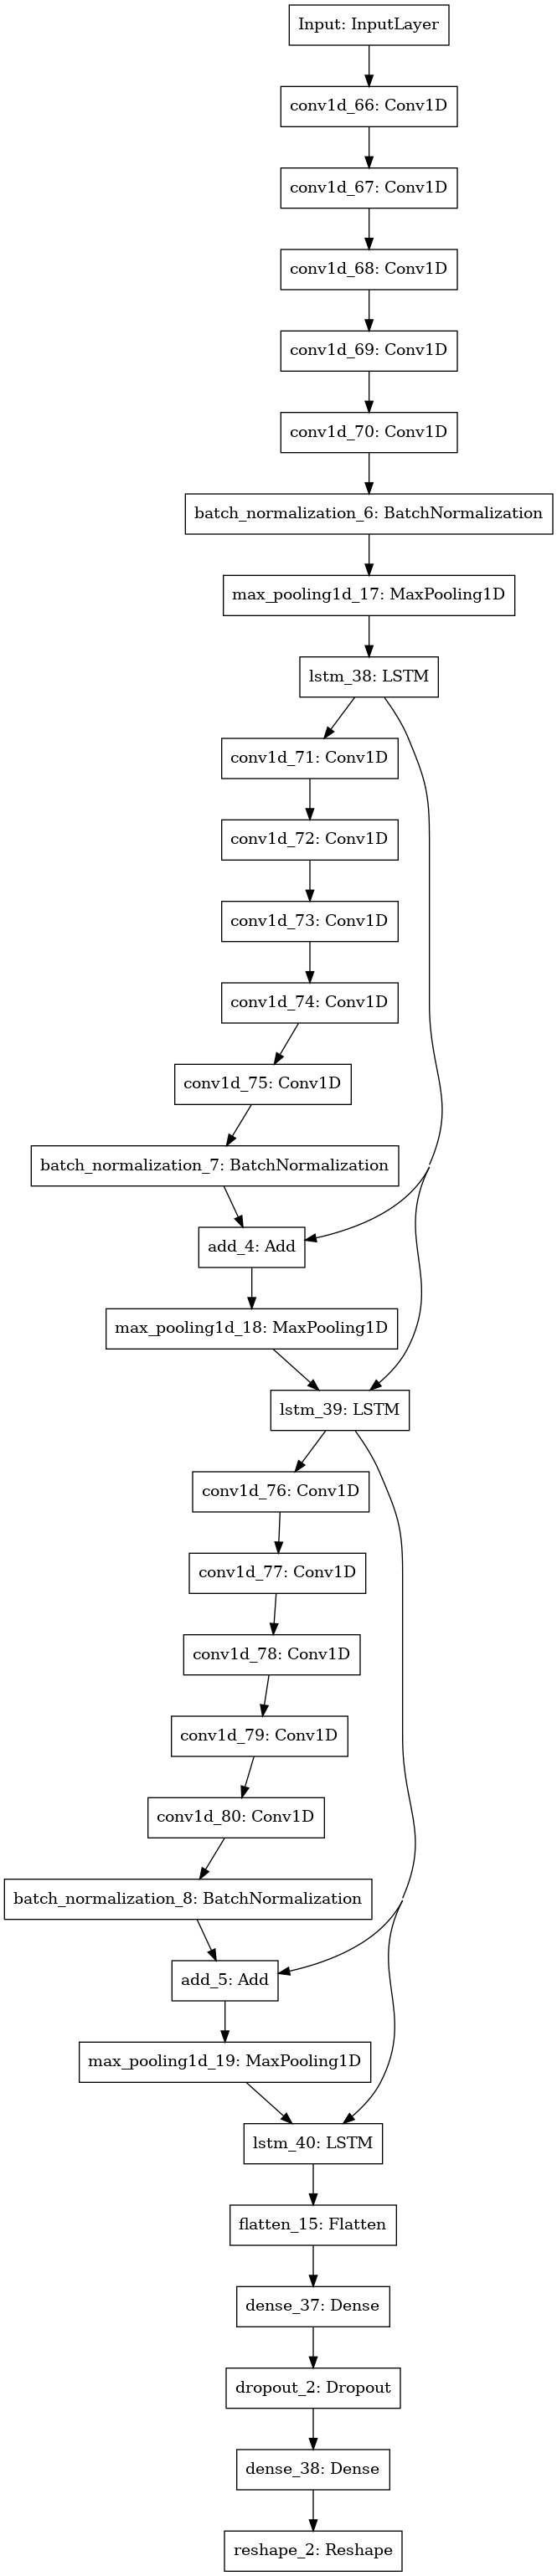

In [50]:
def build_wavenet(input_shape):


    input_layer = tfkl.Input(shape=input_shape, name='Input')

    x = tfkl.Conv1D(filters=16,kernel_size=3,dilation_rate=1,padding="causal",activation='relu')(input_layer)
    x = tfkl.Conv1D(filters=32,kernel_size=3,dilation_rate=2,padding="causal",activation='relu')(x)
    x = tfkl.Conv1D(filters=64,kernel_size=3,dilation_rate=4,padding="causal",activation='relu')(x)
    x = tfkl.Conv1D(filters=128,kernel_size=3,dilation_rate=8,padding="causal",activation='relu')(x)
    x = tfkl.Conv1D(filters=256,kernel_size=3,dilation_rate=16,padding="causal",activation='relu')(x)
    x = tfkl.BatchNormalization()(x)
    x1 = tfkl.MaxPool1D()(x)

    x1,h1,c1 = tfkl.LSTM(units=256,return_sequences = True,return_state=True)(x1)
    
    x = tfkl.Conv1D(filters=16,kernel_size=3,dilation_rate=1,padding="causal",activation='relu')(x1)
    x = tfkl.Conv1D(filters=32,kernel_size=3,dilation_rate=2,padding="causal",activation='relu')(x)
    x = tfkl.Conv1D(filters=64,kernel_size=3,dilation_rate=4,padding="causal",activation='relu')(x)
    x = tfkl.Conv1D(filters=128,kernel_size=3,dilation_rate=8,padding="causal",activation='relu')(x)
    x = tfkl.Conv1D(filters=256,kernel_size=3,dilation_rate=16,padding="causal",activation='relu')(x)
    x = tfkl.BatchNormalization()(x)
    x = tfkl.Add()([x1,x])
    x1 = tfkl.MaxPool1D()(x)
    
    x1,h1,c1 = tfkl.LSTM(units=256,return_sequences = True,return_state=True)(x1,initial_state=[h1,c1])

    x = tfkl.Conv1D(filters=16,kernel_size=3,dilation_rate=1,padding="causal",activation='relu')(x1)
    x = tfkl.Conv1D(filters=32,kernel_size=3,dilation_rate=2,padding="causal",activation='relu')(x)
    x = tfkl.Conv1D(filters=64,kernel_size=3,dilation_rate=4,padding="causal",activation='relu')(x)
    x = tfkl.Conv1D(filters=128,kernel_size=3,dilation_rate=8,padding="causal",activation='relu')(x)
    x = tfkl.Conv1D(filters=256,kernel_size=3,dilation_rate=16,padding="causal",activation='relu')(x)
    x = tfkl.BatchNormalization()(x)
    x = tfkl.Add()([x1,x])
    x1 = tfkl.MaxPool1D()(x)
    
    x1,h1,c1 = tfkl.LSTM(units=256,return_sequences = False,return_state=True)(x1,initial_state=[h1,c1])
       
    x = tfkl.Flatten()(x1)
    #x = tfkl.Concatenate()([tfkl.Flatten()(x), tfkl.Flatten()(x),tfkl.Flatten()(x2)])
    x = tfkl.Dense(256,activation='relu')(x)
    x = tfkl.Dropout(.2)(x)
    x = tfkl.Dense(7*future)(x)

    
    #x2 = tfkl.LSTM(units=256)(input_layer)
    
    output_layer = tfkl.Reshape((future,7))(x)
    
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')
    
    return model


model = build_wavenet(input_shape)
model.summary()
tfk.utils.plot_model(model, expand_nested=True)